# Ipython y Spark para el analisis de datos

*Esta notebook fue creada originalmente como un blog post por [Raúl E. López Briega](http://relopezbriega.com.ar/) en [Mi blog sobre Python](http://relopezbriega.github.io). El contenido esta bajo la licencia BSD.*

Una de las nuevas estrellas en el análisis de datos masivos es [Apache Spark](http://spark.apache.org/). Desarrollado en [Scala](http://www.scala-lang.org/), [Apache Spark](http://spark.apache.org/) es una plataforma de computación de código abierto para el análisis y procesamiento de grandes volúmenes de datos. 

Algunas de las ventajas que nos ofrece [Apache Spark](http://spark.apache.org/) sobre otros [frameworks](http://es.wikipedia.org/wiki/Framework), son:

* **Velocidad:** Sin dudas la velocidad es una de las principales fortalezas de [Apache Spark](http://spark.apache.org/), como esta diseñado para soportar el [procesameinto en memoria](http://en.wikipedia.org/wiki/In-Memory_Processing), puede alcanzar una performance sorprendente en análisis avanzados de datos. Algunos programas escritos utilizando [Apache Spark](http://spark.apache.org/), pueden correr hasta 100x más rápido que utilizando [Hadoop](http://hadoop.apache.org/).
* **Fácil de usar:** Podemos escribir programas en [Python](http://python.org/), [Scala](http://www.scala-lang.org/) o [Java](http://java.com/en/) que hagan uso de las herramientas que ofrece [Apache Spark](http://spark.apache.org/); asimismo nos permite trabajar en forma interactiva (con [Python](http://python.org/) o con [Scala](http://www.scala-lang.org/)) y su [API](http://es.wikipedia.org/wiki/Interfaz_de_programaci%C3%B3n_de_aplicaciones) es muy fácil de aprender. 
* **Generalismo:** El mundo del análisis de datos incluye muchos subgrupos de distinta índole, están los que hacen un análisis investigativo, los que que realizan análisis exploratorios, los que construyen sistemas de procesamientos de datos, etc. Los usuarios de cada uno de esos subgrupos, al tener objetivos distintos, suelen utilizar una gran variedad de herramientas totalmente diferentes. [Apache Spark](http://spark.apache.org/) nos proporciona un gran número de herramientas de alto nivel como [Spark SQL](http://spark.apache.org/sql/), [MLlib](http://spark.apache.org/mllib/) para [machine learning](http://es.wikipedia.org/wiki/Machine_learning), [GraphX](http://spark.apache.org/graphx/), y [Spark Streaming](http://spark.apache.org/streaming/); las cuales pueden ser combinadas para crear aplicaciones multipropósito que ataquen los diferentes dominios del análisis de datos. 



## RDD o  Resilient Distributed Datasets

En el corazón de [Apache Spark](http://spark.apache.org/) se encuentran los [RDDs](http://www.cs.berkeley.edu/~matei/papers/2012/nsdi_spark.pdf).
Los [RDDs](http://www.cs.berkeley.edu/~matei/papers/2012/nsdi_spark.pdf) son una abstracción distribuida que le permite a los programadores realizar cómputos [en memoria](http://en.wikipedia.org/wiki/In-Memory_Processing)  sobre grandes <a href='http://es.wikipedia.org/wiki/Cl%C3%BAster_(inform%C3%A1tica)' target='_blank'>clusters</a> de computadoras sin errores o pérdidas de información. Están especialmente diseñados para el análisis de datos interactivo ([data mining](http://es.wikipedia.org/wiki/Miner%C3%ADa_de_datos)) y para la aplicación de algoritmos iterativos ([MapReduce](http://es.wikipedia.org/wiki/MapReduce)). En ambos casos, mantener los datos en la memoria puede mejorar el rendimiento en una gran proporción. Para lograr la tolerancia a fallos de manera eficiente, [RDDs](http://www.cs.berkeley.edu/~matei/papers/2012/nsdi_spark.pdf) utiliza una forma restringida de memoria compartida. 
Los [RDDs](http://www.cs.berkeley.edu/~matei/papers/2012/nsdi_spark.pdf) son los suficientemente expresivos como para capturar una gran variedad de cálculos.

## Instalando Apache Spark

Para instalar [Apache Spark](http://spark.apache.org/) en forma local y poder comenzar a utilizarlo, pueden seguir los siguientes pasos:

1. En primer lugar, necesitamos tener instalado [Oracle JDK](http://www.oracle.com/technetwork/java/javase/downloads/jdk7-downloads-1880260.html). Para instalarlo en [Ubuntu](http://www.ubuntu.com/) podemos utilizar los siguientes comandos:
<pre>
$ sudo add-apt-repository ppa:webupd8team/java
$ sudo apt-get update
$ sudo apt-get install oracle-jdk7-installer
</pre>

2. Luego nos instalamos las herramientas para trabajar con [Scala](http://www.scala-lang.org/), [SBT](http://www.scala-sbt.org/) con el siguiente comando:
<pre>
$ sudo apt-get install sbt
</pre>

3. Después nos descargamos la última versión de [Apache Spark](http://spark.apache.org/) desde [aquí](http://d3kbcqa49mib13.cloudfront.net/spark-1.0.2.tgz)
<pre></pre>
4. Ahora descomprimimos el archivo:
<pre>
$ tar -xvf spark-1.0.2.tgz 
</pre>

5. Nos movemos a la carpeta recién descomprimida y realizamos la compilación de [Apache Spark](http://spark.apache.org/) utilizando [SBT](http://www.scala-sbt.org/). (tener paciencia, es sabido que [Scala](http://www.scala-lang.org/) tarda mucho en compilar) 
<pre>
$ cd spark-1.0.2
$ sbt/sbt assembly
</pre>

6. Opcionalmente, para facilitar la utilización de [Apache Spark](http://spark.apache.org/) desde la línea de comando, yo modifique mi archivo .bashrc para incluir los siguientes alias:
<pre>
$ echo "alias ipyspark='IPYTHON_OPTS="notebook --pylab inline" ~/spark-1.0.2/bin/pyspark'" >> ~/.bashrc
$ echo "alias pyspark='~/spark-1.0.2/bin/pyspark'" >> ~/.bashrc
$ echo "alias spark='~/spark-1.0.2/bin/spark-shell'" >> ~/.bashrc
</pre>

7. Ahora simplemente tipeando `pyspark` nos abre el interprete interactivo de [Python](http://python.org/) con [Apache Spark](http://spark.apache.org/), tipeando `spark` nos abre el interprete interactivo de [Scala](http://www.scala-lang.org/), y tipeando `ipyspark` nos abre el [notebook de Ipython](http://ipython.org/notebook.html) integrado con [Apache Spark](http://spark.apache.org/)!
<pre>$ ./bin/pyspark #o pyspark si creamos el alias</pre>


## Ejemplo de utilización de Spark con Ipython

Ahora llegó el momento de ensuciarse las manos y probar [Apache Spark](http://spark.apache.org/), vamos a hacer el típico ejercicio de wordcounts; en este caso vamos a contar todas las palabras que posee la Biblia en su versión en inglés y vamos a ver cuantas veces aparece la palabra Dios(God). Para esto nos descargamos la versión de la Biblia en texto plano del [proyecto Gutemberg](http://www.gutenberg.org/ebooks/10).


In [1]:
# Comenzamos con algunos imports.
# No necesitamos importar pyspark porque ya se autoimporta como sc.
from operator import add
import pandas as pd

In [2]:
lineas = sc.textFile("/home/raul/spark-1.0.2/examples/data/Bible.txt") # usamos la función textFile para subir el texto a Spark

In [3]:
# Mapeamos las funciones para realizar la cuenta de las palabras y generamos el RDD.
cuenta = lineas.flatMap(lambda x: x.split(' ')) \
                  .map(lambda x: (x.replace(',' , '').upper(), 1)) \
                  .reduceByKey(add)

In [4]:
# Creamos la lista con las palabras y su respectiva frecuencia.
lista = cuenta.collect()

In [5]:
# Creamos un DataFrame de Pandas para facilitar el manejo de los datos.
dataframe = pd.DataFrame(lista, columns=['palabras', 'cuenta'])

In [6]:
# Nos quedamos solo con las palabras que hacen referencia a Dios
god = dataframe[dataframe['palabras'].apply(lambda x: x.upper() in ['GOD', 'LORD', 'JESUS', 'FATHER'])]
god

,palabras,cuenta
2867,FATHER,814
7329,GOD,3330
8902,LORD,6448
21404,JESUS,893


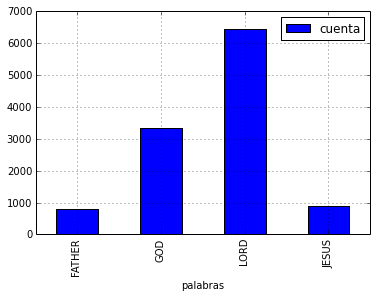

In [7]:
# Realizamos un gráfico de barras sobre los datos
god.set_index('palabras').plot(kind = 'bar')

In [8]:
# Realizamos la sumatoria de las 4 palabras combinadas
god.sum()

palabras    FATHERGODLORDJESUS
cuenta                   11485
dtype: object

Como demuestra el ejemplo, Dios sería nombrado en la Biblia, ya sea como lord, god, jesus o father; unas 11485 veces!


## Conclusión

[Apache Spark](http://spark.apache.org/) es realmente una herramienta muy prometedora, con ella podemos analizar datos con un rendimiento muy alto y combinado con otras herramientas como [Python](http://python.org/), [Numpy](http://www.numpy.org/), [Pandas](http://pandas.pydata.org/) e [IPython](http://ipython.org/); se convierten en un [framework](http://es.wikipedia.org/wiki/Framework) sumamente completo y efectivo para el análisis de grandes volúmenes de datos en forma muy sencilla.

Para más información sobre [Apache Spark](http://spark.apache.org/), pueden visitar su la sección de [ejemplos](http://spark.apache.org/examples.html) de su página oficial.

Espero les haya sido de utilidad este [notebook]((http://ipython.org/notebook.html)).

Saludos!!

*Este post fue escrito utilizando IPython notebook. Pueden descargar este [notebook](https://github.com/relopezbriega/relopezbriega.github.io/blob/master/downloads/pyspark.ipynb) o ver su version estática en [nbviewer](http://nbviewer.ipython.org/github/relopezbriega/relopezbriega.github.io/blob/master/downloads/pyspark.ipynb).*